## DeepSynergy

Author: Kristina Preuer

This Keras script shows how DeepSynergy was evaluated in one cross validation run (executed 5 times - looping over test folds). In this examples fold 0 is used for testing. The script uses 60% of the data  for training (folds 2, 3, 4) and 20% for validation (fold 1). The parameters are loaded with a separate text file (hyperparameters). Validation loss was used to determine the early stopping parameter. After hyperparameter selection the training and validation data was combined (80% = folds 1, 2, 3, 4) and the remaining 20% (fold 0) of the data were used for testing.

The original work was done accordingly with binet (https://github.com/bioinf-jku/binet/tree/master/binet). 

In [1]:
import os, sys

import pandas as pd
import numpy as np
import pickle
import gzip

import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="3" #specify GPU 
import keras as K
import tensorflow as tf
from keras import backend
from keras.backend.tensorflow_backend import set_session
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


#### Define parameters for this cross-validation run

In [2]:
hyperparameter_file = 'hyperparameters' # textfile which contains the hyperparameters of the model
data_file = 'data_test_fold0_tanh.p.gz' # pickle file which contains the data (produced with normalize.ipynb)

#### Define smoothing functions for early stopping parameter

In [3]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

#### Load parameters defining the model

In [4]:
exec(open(hyperparameter_file).read()) 

#### Load data 
tr = 60% of data for training during hyperparameter selection <br>
val = 20% of data for validation during hyperparameter selection

train = tr + val = 80% of data for training during final testing <br>
test = remaining left out 20% of data for unbiased testing 

splitting and normalization was done with normalize.ipynb

In [5]:
file = gzip.open(data_file, 'rb')
X_tr, X_val, X_train, X_test, y_tr, y_val, y_train, y_test = pickle.load(file)
file.close()

#### run set

In [6]:
config = tf.ConfigProto(
         allow_soft_placement=True,
         gpu_options = tf.GPUOptions(allow_growth=True))
set_session(tf.Session(config=config))

In [7]:
model = Sequential()
for i in range(len(layers)):
    if i==0:
        model.add(Dense(layers[i], input_shape=(X_tr.shape[1],), activation=act_func, 
                        kernel_initializer='he_normal'))
        model.add(Dropout(float(input_dropout)))
    elif i==len(layers)-1:
        model.add(Dense(layers[i], activation='linear', kernel_initializer="he_normal"))
    else:
        model.add(Dense(layers[i], activation=act_func, kernel_initializer="he_normal"))
        model.add(Dropout(float(dropout)))
    model.compile(loss='mean_squared_error', optimizer=K.optimizers.SGD(lr=float(eta), momentum=0.5))

#### run model for hyperparameter selection

In [8]:
hist = model.fit(X_tr, y_tr, epochs=epochs, shuffle=True, batch_size=64, validation_data=(X_val, y_val))
val_loss = hist.history['val_loss']
model.reset_states()

Train on 27768 samples, validate on 9228 samples
Epoch 1/1000
27768/27768 [==============================] - 14s - loss: 549.2218 - val_loss: 431.6999
Epoch 2/1000
27768/27768 [==============================] - 10s - loss: 498.5901 - val_loss: 394.5056
Epoch 3/1000
27768/27768 [==============================] - 12s - loss: 457.8219 - val_loss: 376.4125
Epoch 4/1000
27768/27768 [==============================] - 12s - loss: 436.6090 - val_loss: 366.1223
Epoch 5/1000
27768/27768 [==============================] - 11s - loss: 424.7417 - val_loss: 359.7111
Epoch 6/1000
27768/27768 [==============================] - 11s - loss: 415.5902 - val_loss: 353.7520
Epoch 7/1000
27768/27768 [==============================] - 10s - loss: 409.2279 - val_loss: 347.9996
Epoch 8/1000
27768/27768 [==============================] - 11s - loss: 400.1299 - val_loss: 344.2094
Epoch 9/1000
27768/27768 [==============================] - 10s - loss: 393.5562 - val_loss: 338.2026
Epoch 10/1000
27768/27768 [======

27768/27768 [==============================] - 10s - loss: 114.7772 - val_loss: 273.7912
Epoch 80/1000
27768/27768 [==============================] - 11s - loss: 113.1108 - val_loss: 265.0915
Epoch 81/1000
27768/27768 [==============================] - 10s - loss: 112.8855 - val_loss: 273.8550
Epoch 82/1000
27768/27768 [==============================] - 11s - loss: 111.5897 - val_loss: 273.9137ETA: 0s - loss: 11
Epoch 83/1000
27768/27768 [==============================] - 10s - loss: 109.7962 - val_loss: 268.9502
Epoch 84/1000
27768/27768 [==============================] - 10s - loss: 109.1914 - val_loss: 272.6109
Epoch 85/1000
27768/27768 [==============================] - 10s - loss: 107.8846 - val_loss: 274.6504
Epoch 86/1000
27768/27768 [==============================] - 11s - loss: 107.0648 - val_loss: 268.9666
Epoch 87/1000
27768/27768 [==============================] - 10s - loss: 104.0773 - val_loss: 265.9004
Epoch 88/1000
27768/27768 [==============================] - 10s - lo

27768/27768 [==============================] - 10s - loss: 73.9742 - val_loss: 256.0655
Epoch 159/1000
27768/27768 [==============================] - 10s - loss: 73.0966 - val_loss: 259.0105
Epoch 160/1000
27768/27768 [==============================] - 9s - loss: 72.7347 - val_loss: 254.4603
Epoch 161/1000
27768/27768 [==============================] - 9s - loss: 71.9439 - val_loss: 259.2296
Epoch 162/1000
27768/27768 [==============================] - 10s - loss: 72.6330 - val_loss: 253.6472
Epoch 163/1000
27768/27768 [==============================] - 10s - loss: 72.0225 - val_loss: 257.4166
Epoch 164/1000
27768/27768 [==============================] - 10s - loss: 71.3923 - val_loss: 255.0537
Epoch 165/1000
27768/27768 [==============================] - 10s - loss: 72.1197 - val_loss: 257.4399
Epoch 166/1000
27768/27768 [==============================] - 10s - loss: 72.0653 - val_loss: 257.7409
Epoch 167/1000
27768/27768 [==============================] - 10s - loss: 71.6631 - val_lo

27768/27768 [==============================] - 10s - loss: 64.2315 - val_loss: 250.9348
Epoch 238/1000
27768/27768 [==============================] - 10s - loss: 64.1220 - val_loss: 252.2686
Epoch 239/1000
27768/27768 [==============================] - 10s - loss: 63.0794 - val_loss: 252.5777
Epoch 240/1000
27768/27768 [==============================] - 10s - loss: 63.0967 - val_loss: 249.9221
Epoch 241/1000
27768/27768 [==============================] - 10s - loss: 63.5815 - val_loss: 250.4643
Epoch 242/1000
27768/27768 [==============================] - 10s - loss: 63.0916 - val_loss: 250.7099
Epoch 243/1000
27768/27768 [==============================] - 10s - loss: 63.0929 - val_loss: 249.4416
Epoch 244/1000
27768/27768 [==============================] - 10s - loss: 62.5454 - val_loss: 250.1245
Epoch 245/1000
27768/27768 [==============================] - 10s - loss: 63.3136 - val_loss: 250.6501
Epoch 246/1000
27768/27768 [==============================] - 10s - loss: 62.9995 - val_

27768/27768 [==============================] - 10s - loss: 59.0674 - val_loss: 248.0311
Epoch 317/1000
27768/27768 [==============================] - 10s - loss: 58.4758 - val_loss: 248.4237
Epoch 318/1000
27768/27768 [==============================] - 10s - loss: 58.9053 - val_loss: 246.5671
Epoch 319/1000
27768/27768 [==============================] - 10s - loss: 58.7352 - val_loss: 247.2169
Epoch 320/1000
27768/27768 [==============================] - 10s - loss: 59.3889 - val_loss: 245.9386
Epoch 321/1000
27768/27768 [==============================] - 10s - loss: 59.1156 - val_loss: 246.6182
Epoch 322/1000
27768/27768 [==============================] - 10s - loss: 58.5936 - val_loss: 246.4784
Epoch 323/1000
27768/27768 [==============================] - 10s - loss: 58.2745 - val_loss: 247.9636
Epoch 324/1000
27768/27768 [==============================] - 10s - loss: 58.4598 - val_loss: 247.3351
Epoch 325/1000
27768/27768 [==============================] - 10s - loss: 58.7609 - val_

27768/27768 [==============================] - 10s - loss: 55.5415 - val_loss: 246.0059
Epoch 396/1000
27768/27768 [==============================] - 10s - loss: 55.9877 - val_loss: 244.7765
Epoch 397/1000
27768/27768 [==============================] - 10s - loss: 56.9279 - val_loss: 244.4952
Epoch 398/1000
27768/27768 [==============================] - 11s - loss: 56.1821 - val_loss: 245.0537
Epoch 399/1000
27768/27768 [==============================] - 11s - loss: 56.0966 - val_loss: 243.4693
Epoch 400/1000
27768/27768 [==============================] - 10s - loss: 55.9491 - val_loss: 244.2997
Epoch 401/1000
27768/27768 [==============================] - 10s - loss: 55.9422 - val_loss: 245.7247
Epoch 402/1000
27768/27768 [==============================] - 10s - loss: 55.8803 - val_loss: 242.9750
Epoch 403/1000
27768/27768 [==============================] - 11s - loss: 55.6422 - val_loss: 244.0821
Epoch 404/1000
27768/27768 [==============================] - 10s - loss: 55.9852 - val_

27768/27768 [==============================] - 10s - loss: 54.7027 - val_loss: 243.7835
Epoch 475/1000
27768/27768 [==============================] - 10s - loss: 54.1409 - val_loss: 243.8639
Epoch 476/1000
27768/27768 [==============================] - 10s - loss: 54.5588 - val_loss: 245.2959
Epoch 477/1000
27768/27768 [==============================] - 11s - loss: 54.0104 - val_loss: 243.8944
Epoch 478/1000
27768/27768 [==============================] - 10s - loss: 54.5951 - val_loss: 244.232554.
Epoch 479/1000
27768/27768 [==============================] - 10s - loss: 53.8412 - val_loss: 242.5552
Epoch 480/1000
27768/27768 [==============================] - 10s - loss: 54.1350 - val_loss: 242.6774
Epoch 481/1000
27768/27768 [==============================] - 11s - loss: 53.1850 - val_loss: 242.1814
Epoch 482/1000
27768/27768 [==============================] - 10s - loss: 54.0720 - val_loss: 241.8083
Epoch 483/1000
27768/27768 [==============================] - 10s - loss: 54.3814 - v

27768/27768 [==============================] - 10s - loss: 52.5778 - val_loss: 243.3491
Epoch 554/1000
27768/27768 [==============================] - 10s - loss: 53.2254 - val_loss: 241.5249
Epoch 555/1000
27768/27768 [==============================] - 10s - loss: 53.3561 - val_loss: 241.9886
Epoch 556/1000
27768/27768 [==============================] - 10s - loss: 52.0301 - val_loss: 242.6590
Epoch 557/1000
27768/27768 [==============================] - 10s - loss: 52.8843 - val_loss: 242.3674
Epoch 558/1000
27768/27768 [==============================] - 10s - loss: 53.2984 - val_loss: 242.6844
Epoch 559/1000
27768/27768 [==============================] - 10s - loss: 52.9988 - val_loss: 242.0793
Epoch 560/1000
27768/27768 [==============================] - 10s - loss: 52.8475 - val_loss: 241.6732
Epoch 561/1000
27768/27768 [==============================] - 10s - loss: 52.7622 - val_loss: 240.9438
Epoch 562/1000
27768/27768 [==============================] - 10s - loss: 52.8706 - val_

27768/27768 [==============================] - 10s - loss: 51.9148 - val_loss: 242.6135
Epoch 633/1000
27768/27768 [==============================] - 10s - loss: 52.0468 - val_loss: 240.7845
Epoch 634/1000
27768/27768 [==============================] - 10s - loss: 51.7918 - val_loss: 241.5661
Epoch 635/1000
27768/27768 [==============================] - 10s - loss: 52.0955 - val_loss: 242.2599
Epoch 636/1000
27768/27768 [==============================] - 10s - loss: 51.9596 - val_loss: 242.9193
Epoch 637/1000
27768/27768 [==============================] - 11s - loss: 51.8969 - val_loss: 242.5096
Epoch 638/1000
27768/27768 [==============================] - 10s - loss: 52.6221 - val_loss: 243.0209
Epoch 639/1000
27768/27768 [==============================] - 10s - loss: 51.7220 - val_loss: 241.7813
Epoch 640/1000
27768/27768 [==============================] - 10s - loss: 51.7412 - val_loss: 241.3093
Epoch 641/1000
27768/27768 [==============================] - 10s - loss: 51.8084 - val_

27768/27768 [==============================] - 10s - loss: 50.8806 - val_loss: 241.3558
Epoch 712/1000
27768/27768 [==============================] - 10s - loss: 51.5038 - val_loss: 241.8467
Epoch 713/1000
27768/27768 [==============================] - 10s - loss: 51.2471 - val_loss: 240.54275
Epoch 714/1000
27768/27768 [==============================] - 10s - loss: 51.2457 - val_loss: 242.3608
Epoch 715/1000
27768/27768 [==============================] - 10s - loss: 50.3365 - val_loss: 240.1709
Epoch 716/1000
27768/27768 [==============================] - 10s - loss: 50.8743 - val_loss: 241.8927
Epoch 717/1000
27768/27768 [==============================] - 10s - loss: 50.4867 - val_loss: 241.3642
Epoch 718/1000
27768/27768 [==============================] - 10s - loss: 50.7760 - val_loss: 238.6960
Epoch 719/1000
27768/27768 [==============================] - 10s - loss: 50.9015 - val_loss: 240.6457
Epoch 720/1000
27768/27768 [==============================] - 10s - loss: 50.9861 - val

27768/27768 [==============================] - 11s - loss: 50.0493 - val_loss: 240.6368
Epoch 791/1000
27768/27768 [==============================] - 10s - loss: 50.6003 - val_loss: 241.1208
Epoch 792/1000
27768/27768 [==============================] - 10s - loss: 50.4909 - val_loss: 241.1121
Epoch 793/1000
27768/27768 [==============================] - 10s - loss: 50.2786 - val_loss: 240.6919
Epoch 794/1000
27768/27768 [==============================] - 10s - loss: 49.9899 - val_loss: 240.9217
Epoch 795/1000
27768/27768 [==============================] - 10s - loss: 50.0243 - val_loss: 241.8002
Epoch 796/1000
27768/27768 [==============================] - 10s - loss: 49.6478 - val_loss: 240.9761
Epoch 797/1000
27768/27768 [==============================] - 10s - loss: 50.1700 - val_loss: 240.5760
Epoch 798/1000
27768/27768 [==============================] - 11s - loss: 49.9551 - val_loss: 239.4830
Epoch 799/1000
27768/27768 [==============================] - 11s - loss: 50.3750 - val_

27768/27768 [==============================] - 10s - loss: 49.2442 - val_loss: 239.6733
Epoch 870/1000
27768/27768 [==============================] - 11s - loss: 49.6518 - val_loss: 240.7800
Epoch 871/1000
27768/27768 [==============================] - 10s - loss: 49.2866 - val_loss: 239.1456
Epoch 872/1000
27768/27768 [==============================] - 11s - loss: 49.6463 - val_loss: 239.5848
Epoch 873/1000
27768/27768 [==============================] - 11s - loss: 49.2013 - val_loss: 239.1766
Epoch 874/1000
27768/27768 [==============================] - 10s - loss: 49.6699 - val_loss: 239.6886
Epoch 875/1000
27768/27768 [==============================] - 10s - loss: 49.3274 - val_loss: 239.8265
Epoch 876/1000
27768/27768 [==============================] - 10s - loss: 49.4908 - val_loss: 238.9150
Epoch 877/1000
27768/27768 [==============================] - 10s - loss: 49.2227 - val_loss: 240.2558
Epoch 878/1000
27768/27768 [==============================] - 10s - loss: 49.5263 - val_

27768/27768 [==============================] - 10s - loss: 49.0722 - val_loss: 238.3177
Epoch 949/1000
27768/27768 [==============================] - 12s - loss: 48.8655 - val_loss: 239.9792
Epoch 950/1000
27768/27768 [==============================] - 12s - loss: 49.2590 - val_loss: 238.0692
Epoch 951/1000
27768/27768 [==============================] - 11s - loss: 48.5203 - val_loss: 238.905248.
Epoch 952/1000
27768/27768 [==============================] - 10s - loss: 49.2605 - val_loss: 239.2757
Epoch 953/1000
27768/27768 [==============================] - 10s - loss: 48.7434 - val_loss: 239.1617
Epoch 954/1000
27768/27768 [==============================] - 10s - loss: 48.6436 - val_loss: 238.4002
Epoch 955/1000
27768/27768 [==============================] - 10s - loss: 49.1256 - val_loss: 238.8454
Epoch 956/1000
27768/27768 [==============================] - 10s - loss: 49.3192 - val_loss: 239.5877
Epoch 957/1000
27768/27768 [==============================] - 10s - loss: 49.1037 - v

#### smooth validation loss for early stopping parameter determination

In [9]:
average_over = 15
mov_av = moving_average(np.array(val_loss), average_over)
smooth_val_loss = np.pad(mov_av, int(average_over/2), mode='edge')
epo = np.argmin(smooth_val_loss)

#### determine model performance for methods comparison 

In [10]:
hist = model.fit(X_train, y_train, epochs=epo, shuffle=True, batch_size=64, validation_data=(X_test, y_test))
test_loss = hist.history['val_loss']

Train on 36996 samples, validate on 9108 samples
Epoch 1/969
36996/36996 [==============================] - 14s - loss: 99.1230 - val_loss: 229.9293
Epoch 2/969
36996/36996 [==============================] - 13s - loss: 90.1500 - val_loss: 226.6384
Epoch 3/969
36996/36996 [==============================] - 13s - loss: 85.1590 - val_loss: 231.4438
Epoch 4/969
36996/36996 [==============================] - 13s - loss: 81.8698 - val_loss: 231.9628
Epoch 5/969
36996/36996 [==============================] - 13s - loss: 79.4076 - val_loss: 228.2864
Epoch 6/969
36996/36996 [==============================] - 14s - loss: 76.6544 - val_loss: 226.6401
Epoch 7/969
36996/36996 [==============================] - 13s - loss: 75.1624 - val_loss: 225.1818
Epoch 8/969
36996/36996 [==============================] - 14s - loss: 73.3966 - val_loss: 225.7805
Epoch 9/969
36996/36996 [==============================] - 13s - loss: 72.2984 - val_loss: 222.1198
Epoch 10/969
36996/36996 [=========================

36996/36996 [==============================] - 13s - loss: 55.6145 - val_loss: 220.5527
Epoch 82/969
36996/36996 [==============================] - 13s - loss: 55.3863 - val_loss: 218.5557
Epoch 83/969
36996/36996 [==============================] - 13s - loss: 55.5201 - val_loss: 217.0060
Epoch 84/969
36996/36996 [==============================] - 13s - loss: 55.7060 - val_loss: 218.6678
Epoch 85/969
36996/36996 [==============================] - 13s - loss: 54.9932 - val_loss: 216.6798
Epoch 86/969
36996/36996 [==============================] - 13s - loss: 55.3825 - val_loss: 217.6851
Epoch 87/969
36996/36996 [==============================] - 13s - loss: 55.4849 - val_loss: 224.4742
Epoch 88/969
36996/36996 [==============================] - 13s - loss: 55.5776 - val_loss: 220.0732
Epoch 89/969
36996/36996 [==============================] - 13s - loss: 55.2485 - val_loss: 218.2701
Epoch 90/969
36996/36996 [==============================] - 13s - loss: 55.2162 - val_loss: 219.6081
Epo

36996/36996 [==============================] - 13s - loss: 52.4210 - val_loss: 219.1220
Epoch 162/969
36996/36996 [==============================] - 13s - loss: 52.3970 - val_loss: 221.3873
Epoch 163/969
36996/36996 [==============================] - 13s - loss: 52.1666 - val_loss: 219.7253
Epoch 164/969
36996/36996 [==============================] - 13s - loss: 52.4594 - val_loss: 217.6198
Epoch 165/969
36996/36996 [==============================] - 14s - loss: 52.5242 - val_loss: 219.6265
Epoch 166/969
36996/36996 [==============================] - 14s - loss: 52.9579 - val_loss: 219.0528
Epoch 167/969
36996/36996 [==============================] - 14s - loss: 52.4813 - val_loss: 216.1858
Epoch 168/969
36996/36996 [==============================] - 13s - loss: 52.3867 - val_loss: 219.0616
Epoch 169/969
36996/36996 [==============================] - 13s - loss: 52.1549 - val_loss: 222.6666
Epoch 170/969
36996/36996 [==============================] - 13s - loss: 52.9758 - val_loss: 216

36996/36996 [==============================] - 13s - loss: 50.9452 - val_loss: 217.4695
Epoch 242/969
36996/36996 [==============================] - 13s - loss: 51.0460 - val_loss: 214.1201
Epoch 243/969
36996/36996 [==============================] - 13s - loss: 51.1643 - val_loss: 218.4852
Epoch 244/969
36996/36996 [==============================] - 13s - loss: 50.7125 - val_loss: 215.366450.70
Epoch 245/969
36996/36996 [==============================] - 13s - loss: 50.9409 - val_loss: 217.0023
Epoch 246/969
36996/36996 [==============================] - 13s - loss: 51.0587 - val_loss: 217.2004
Epoch 247/969
36996/36996 [==============================] - 13s - loss: 51.1801 - val_loss: 216.6977
Epoch 248/969
36996/36996 [==============================] - 13s - loss: 51.3696 - val_loss: 222.2785
Epoch 249/969
36996/36996 [==============================] - 13s - loss: 50.5642 - val_loss: 216.9187
Epoch 250/969
36996/36996 [==============================] - 13s - loss: 50.7991 - val_loss

36996/36996 [==============================] - 14s - loss: 50.4426 - val_loss: 213.7219
Epoch 322/969
36996/36996 [==============================] - 13s - loss: 50.3346 - val_loss: 214.8201
Epoch 323/969
36996/36996 [==============================] - 13s - loss: 50.3656 - val_loss: 218.8152
Epoch 324/969
36996/36996 [==============================] - 12s - loss: 50.1510 - val_loss: 216.2799
Epoch 325/969
36996/36996 [==============================] - 13s - loss: 50.1473 - val_loss: 214.4641
Epoch 326/969
36996/36996 [==============================] - 13s - loss: 50.4789 - val_loss: 218.2108
Epoch 327/969
36996/36996 [==============================] - 13s - loss: 50.3882 - val_loss: 215.7226
Epoch 328/969
36996/36996 [==============================] - 13s - loss: 50.4662 - val_loss: 217.9678
Epoch 329/969
36996/36996 [==============================] - 13s - loss: 49.9663 - val_loss: 217.0131
Epoch 330/969
36996/36996 [==============================] - 13s - loss: 49.8429 - val_loss: 218

36996/36996 [==============================] - 13s - loss: 49.0400 - val_loss: 214.9461
Epoch 402/969
36996/36996 [==============================] - 13s - loss: 49.4859 - val_loss: 215.7599
Epoch 403/969
36996/36996 [==============================] - 13s - loss: 49.1015 - val_loss: 216.2554
Epoch 404/969
36996/36996 [==============================] - 14s - loss: 48.8857 - val_loss: 216.2487
Epoch 405/969
36996/36996 [==============================] - 13s - loss: 49.2016 - val_loss: 214.8427
Epoch 406/969
36996/36996 [==============================] - 13s - loss: 49.2525 - val_loss: 213.6929
Epoch 407/969
36996/36996 [==============================] - 14s - loss: 49.3026 - val_loss: 216.3217
Epoch 408/969
36996/36996 [==============================] - 13s - loss: 49.1787 - val_loss: 213.5153
Epoch 409/969
36996/36996 [==============================] - 13s - loss: 49.3106 - val_loss: 212.1379
Epoch 410/969
36996/36996 [==============================] - 13s - loss: 49.2179 - val_loss: 216

36996/36996 [==============================] - 14s - loss: 48.8269 - val_loss: 213.0993
Epoch 482/969
36996/36996 [==============================] - 13s - loss: 48.8564 - val_loss: 213.8869
Epoch 483/969
36996/36996 [==============================] - 13s - loss: 48.7706 - val_loss: 213.5876
Epoch 484/969
36996/36996 [==============================] - 13s - loss: 48.9047 - val_loss: 217.6497
Epoch 485/969
36996/36996 [==============================] - 13s - loss: 48.7752 - val_loss: 215.5399
Epoch 486/969
36996/36996 [==============================] - 13s - loss: 48.6910 - val_loss: 214.8898
Epoch 487/969
36996/36996 [==============================] - 13s - loss: 48.8181 - val_loss: 213.8929
Epoch 488/969
36996/36996 [==============================] - 13s - loss: 48.2553 - val_loss: 217.3099
Epoch 489/969
36996/36996 [==============================] - 13s - loss: 48.8388 - val_loss: 214.6224
Epoch 490/969
36996/36996 [==============================] - 13s - loss: 48.7599 - val_loss: 215

36996/36996 [==============================] - 13s - loss: 48.1268 - val_loss: 214.1177
Epoch 562/969
36996/36996 [==============================] - 13s - loss: 48.0361 - val_loss: 214.8819
Epoch 563/969
36996/36996 [==============================] - 13s - loss: 48.0101 - val_loss: 215.0117
Epoch 564/969
36996/36996 [==============================] - 13s - loss: 48.1760 - val_loss: 211.84454
Epoch 565/969
36996/36996 [==============================] - 13s - loss: 48.4278 - val_loss: 214.9706
Epoch 566/969
36996/36996 [==============================] - 13s - loss: 48.0004 - val_loss: 213.8389
Epoch 567/969
36996/36996 [==============================] - 13s - loss: 47.9553 - val_loss: 213.3417
Epoch 568/969
36996/36996 [==============================] - 13s - loss: 48.1601 - val_loss: 214.5286
Epoch 569/969
36996/36996 [==============================] - 13s - loss: 48.3476 - val_loss: 214.3449
Epoch 570/969
36996/36996 [==============================] - 13s - loss: 48.6686 - val_loss: 21

36996/36996 [==============================] - 13s - loss: 47.5086 - val_loss: 215.9626
Epoch 642/969
36996/36996 [==============================] - 13s - loss: 47.7249 - val_loss: 214.1019
Epoch 643/969
36996/36996 [==============================] - 13s - loss: 47.8749 - val_loss: 211.1648
Epoch 644/969
36996/36996 [==============================] - 13s - loss: 47.6126 - val_loss: 215.2331
Epoch 645/969
36996/36996 [==============================] - 13s - loss: 47.8778 - val_loss: 212.9951
Epoch 646/969
36996/36996 [==============================] - 13s - loss: 47.4479 - val_loss: 214.7075
Epoch 647/969
36996/36996 [==============================] - 13s - loss: 47.7500 - val_loss: 213.8867
Epoch 648/969
36996/36996 [==============================] - 14s - loss: 48.4060 - val_loss: 214.1078
Epoch 649/969
36996/36996 [==============================] - 13s - loss: 47.8734 - val_loss: 213.1287
Epoch 650/969
36996/36996 [==============================] - 13s - loss: 47.9027 - val_loss: 212

36996/36996 [==============================] - 13s - loss: 47.6216 - val_loss: 212.5515
Epoch 722/969
36996/36996 [==============================] - 14s - loss: 47.5158 - val_loss: 212.6746
Epoch 723/969
36996/36996 [==============================] - 13s - loss: 47.2956 - val_loss: 213.5237
Epoch 724/969
36996/36996 [==============================] - 13s - loss: 47.3177 - val_loss: 212.9098
Epoch 725/969
36996/36996 [==============================] - 14s - loss: 47.3856 - val_loss: 211.5271
Epoch 726/969
36996/36996 [==============================] - 14s - loss: 47.2872 - val_loss: 210.6451
Epoch 727/969
36996/36996 [==============================] - 14s - loss: 47.2749 - val_loss: 212.4945
Epoch 728/969
36996/36996 [==============================] - 13s - loss: 47.5068 - val_loss: 211.6581
Epoch 729/969
36996/36996 [==============================] - 13s - loss: 47.3825 - val_loss: 210.7149
Epoch 730/969
36996/36996 [==============================] - 13s - loss: 47.1976 - val_loss: 213

36996/36996 [==============================] - 13s - loss: 46.6715 - val_loss: 213.3834
Epoch 802/969
36996/36996 [==============================] - 13s - loss: 46.9064 - val_loss: 212.7213
Epoch 803/969
36996/36996 [==============================] - 13s - loss: 47.1239 - val_loss: 212.0241
Epoch 804/969
36996/36996 [==============================] - 13s - loss: 47.1485 - val_loss: 212.621347.22
Epoch 805/969
36996/36996 [==============================] - 14s - loss: 46.8954 - val_loss: 211.7648
Epoch 806/969
36996/36996 [==============================] - 13s - loss: 46.6754 - val_loss: 213.4224
Epoch 807/969
36996/36996 [==============================] - 13s - loss: 46.9077 - val_loss: 208.5928
Epoch 808/969
36996/36996 [==============================] - 13s - loss: 46.6726 - val_loss: 211.3821
Epoch 809/969
36996/36996 [==============================] - 13s - loss: 47.1044 - val_loss: 212.9195
Epoch 810/969
36996/36996 [==============================] - 13s - loss: 47.2205 - val_loss

36996/36996 [==============================] - 13s - loss: 47.0898 - val_loss: 211.3397
Epoch 882/969
36996/36996 [==============================] - 13s - loss: 46.7277 - val_loss: 211.3466
Epoch 883/969
36996/36996 [==============================] - 13s - loss: 46.3957 - val_loss: 210.2486
Epoch 884/969
36996/36996 [==============================] - 13s - loss: 46.8589 - val_loss: 212.4682
Epoch 885/969
36996/36996 [==============================] - 13s - loss: 46.4845 - val_loss: 211.6748
Epoch 886/969
36996/36996 [==============================] - 13s - loss: 46.8345 - val_loss: 210.0084
Epoch 887/969
36996/36996 [==============================] - 13s - loss: 46.8743 - val_loss: 211.2956
Epoch 888/969
36996/36996 [==============================] - 13s - loss: 46.2574 - val_loss: 210.9464
Epoch 889/969
36996/36996 [==============================] - 13s - loss: 46.5478 - val_loss: 214.5528
Epoch 890/969
36996/36996 [==============================] - 13s - loss: 46.9126 - val_loss: 210

36996/36996 [==============================] - 13s - loss: 46.6603 - val_loss: 209.6119
Epoch 962/969
36996/36996 [==============================] - 13s - loss: 46.2510 - val_loss: 210.6772
Epoch 963/969
36996/36996 [==============================] - 13s - loss: 46.4645 - val_loss: 212.4693
Epoch 964/969
36996/36996 [==============================] - 13s - loss: 46.3138 - val_loss: 209.2640
Epoch 965/969
36996/36996 [==============================] - 13s - loss: 46.4166 - val_loss: 211.3133
Epoch 966/969
36996/36996 [==============================] - 13s - loss: 46.4151 - val_loss: 211.8308
Epoch 967/969
36996/36996 [==============================] - 13s - loss: 46.8171 - val_loss: 210.4081
Epoch 968/969
36996/36996 [==============================] - 13s - loss: 46.2715 - val_loss: 210.8014
Epoch 969/969
36996/36996 [==============================] - 13s - loss: 46.6977 - val_loss: 209.5731


#### plot performance 

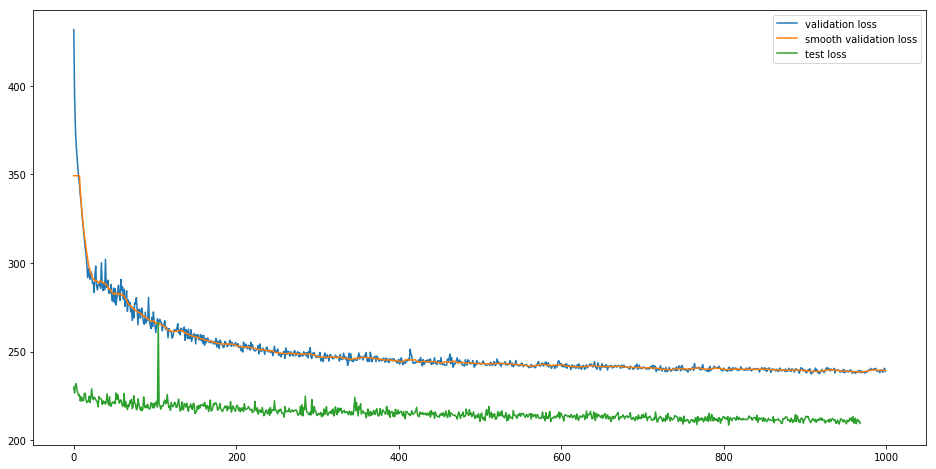

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(val_loss, label='validation loss')
ax.plot(smooth_val_loss, label='smooth validation loss')
ax.plot(test_loss, label='test loss')
ax.legend()
plt.show()